### Set up the Notebook

In [1]:
# Import Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/global-salary-data/salary_data.csv


#### Loading up the dataset

In [2]:
# Create a variable named 'data'
data = pd.read_csv("/kaggle/input/global-salary-data/salary_data.csv")

#### Initial inspection of the data

In [3]:
# Display the first 10 rows
print("first 10 rows")
data.head(10)

first 10 rows


,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
3,Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
4,American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00
5,Andorra,Europe,Monthly,3668.08,4069.77,1120.51,17653.28
6,Angola,Africa,Monthly,284.39,314.39,79.32,1403.96
7,Antigua and Barbuda,Caribbean,Monthly,1548.15,1677.78,422.22,7444.44
8,Argentina,South America,Monthly,110.28,129.42,32.57,577.13
9,Armenia,Asia,Monthly,1700.25,1974.32,497.39,8780.39


In [4]:
# Display the columns
data.columns

Index(['country_name', 'continent_name', 'wage_span', 'median_salary',
       'average_salary', 'lowest_salary', 'highest_salary'],
      dtype='object')

In [6]:
# Check for the data types
data.dtypes

country_name       object
continent_name     object
wage_span          object
median_salary     float64
average_salary    float64
lowest_salary     float64
highest_salary    float64
dtype: object

In [8]:
# Display the information to get a better understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    221 non-null    object 
 1   continent_name  221 non-null    object 
 2   wage_span       221 non-null    object 
 3   median_salary   221 non-null    float64
 4   average_salary  221 non-null    float64
 5   lowest_salary   221 non-null    float64
 6   highest_salary  221 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [17]:
# Get the shape
print("Rows,Columns!")
data.shape

Rows,Columns!


(221, 7)

In [18]:
# Take a look at the last few rows
data.tail()

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
216,Virgin Islands (US),North America,Monthly,2380.000000,2710.000000,680.000000,12000.000000
217,Western Sahara,Africa,Monthly,908.560000,1011.670000,254.860000,4503.890000
218,Yemen,Asia,Monthly,120.980000,133.360000,33.620000,594.930000
219,Zambia,Africa,Monthly,0.261335,0.285524,0.072092,1.271103
220,Zimbabwe,Africa,Monthly,555.402040,602.376350,151.423050,2674.772000


#### Summary Statistics

In [19]:
# Generate a summary statistics of all the numerical values
data.describe()

,median_salary,average_salary,lowest_salary,highest_salary
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


In [20]:
# Generate a summary statistics for including non-numerical values
data.describe(include='all')

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
count,221,221,221,221.000000,221.000000,221.000000,221.000000
unique,221,9,1,NaN,NaN,NaN,NaN
top,Afghanistan,Africa,Monthly,NaN,NaN,NaN,NaN
freq,1,57,221,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1762.631906,1982.339812,502.783204,8802.165619
std,NaN,NaN,NaN,1634.708716,1835.429193,470.073328,8140.210641
min,NaN,NaN,NaN,0.261335,0.285524,0.072092,1.271103
25%,NaN,NaN,NaN,567.210000,651.000000,163.930000,2900.480000
50%,NaN,NaN,NaN,1227.460000,1344.230000,339.450000,5974.360000
75%,NaN,NaN,NaN,2389.010000,2740.000000,690.000000,12050.740000


In [21]:
# Calculate the average of the column 'median_salary'
data["median_salary"].mean()

1762.6319056924888

#### Count Missing values

In [22]:
# Create a boolean values indicating the missing data
data.isnull()

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
216,False,False,False,False,False,False,False
217,False,False,False,False,False,False,False
218,False,False,False,False,False,False,False
219,False,False,False,False,False,False,False


In [25]:
# Count the number of Missing values in each column
data.isnull().sum()

country_name      0
continent_name    0
wage_span         0
median_salary     0
average_salary    0
lowest_salary     0
highest_salary    0
dtype: int64

#### Calculate the percentage of Missing values for each column

In [29]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a new DataFrame to display the missing percentages
missing_data = pd.DataFrame({'Column': data.columns, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_data)

                        Column  Missing Percentage
country_name      country_name                 0.0
continent_name  continent_name                 0.0
wage_span            wage_span                 0.0
median_salary    median_salary                 0.0
average_salary  average_salary                 0.0
lowest_salary    lowest_salary                 0.0
highest_salary  highest_salary                 0.0


- Note: In this case we have zero Missing values in any of the Columns.

#### Unique Values:

In [30]:
# Get the unique values for the column 'continent_name'
data['continent_name'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Caribbean',
       'South America', 'North America', 'Central America',
       'Northern America'], dtype=object)

In [31]:
# Count the number of unique values in the column 'continent_name'
data['continent_name'].nunique()

9

- Note: Now we're going to do a "Correlation Analysis"

#### Correlation Analysis:

In [34]:
# Generate the correlation for all numerical values
import pandas as pd

# Select only the numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                median_salary  average_salary  lowest_salary  highest_salary
median_salary        1.000000        0.999235       0.996542        0.998908
average_salary       0.999235        1.000000       0.996948        0.999780
lowest_salary        0.996542        0.996948       1.000000        0.995107
highest_salary       0.998908        0.999780       0.995107        1.000000


In [35]:
# Calculate the correlation between two specific columns.
data['median_salary'].corr(data['lowest_salary'])

0.9965415232797346

- Which country has the highest median salary?

In [37]:
highest_median_salary_country = data[data['median_salary'] == data['median_salary'].max()]['country_name'].values[0]
print(f"The country with the highest median salary is {highest_median_salary_country}.")

The country with the highest median salary is Switzerland.


-  Which continent has the highest average salary?



In [39]:
continent_with_highest_avg_salary = data[data['average_salary'] == data['average_salary'].max()]['continent_name'].values[0]
print(f"The continent with the highest average salary is {continent_with_highest_avg_salary}.")

The continent with the highest average salary is Europe.


 - What is the average salary for each continent?



In [40]:
average_salary_by_continent = data.groupby('continent_name')['average_salary'].mean()
print(average_salary_by_continent)

continent_name
Africa               772.719863
Asia                1727.657722
Caribbean           1617.098333
Central America     1892.721250
Europe              3576.279912
North America       2647.316667
Northern America    5221.610000
Oceania             1946.011667
South America       1526.053077
Name: average_salary, dtype: float64


- Are there any countries with exceptionally low or high salaries compared to their respective continents?

In [47]:
data['salary_deviation_from_continent'] = data.groupby('continent_name')['average_salary'].transform(lambda x: x - x.mean())

# Countries with salaries significantly lower than their continent's average
low_salary_countries = data[data['salary_deviation_from_continent'] < -5000]
print("Countries with salaries significantly lower than their continent's average:")
print(low_salary_countries[['country_name', 'continent_name', 'average_salary', 'salary_deviation_from_continent']])

# Countries with salaries significantly higher than their continent's average
high_salary_countries = data[data['salary_deviation_from_continent'] > 5000]
print("\nCountries with salaries significantly higher than their continent's average:")
print(high_salary_countries[['country_name', 'continent_name', 'average_salary', 'salary_deviation_from_continent']])


Countries with salaries significantly lower than their continent's average:
Empty DataFrame
Columns: [country_name, continent_name, average_salary, salary_deviation_from_continent]
Index: []

Countries with salaries significantly higher than their continent's average:
    country_name continent_name  average_salary  \
83      Guernsey         Europe         9409.76   
192  Switzerland         Europe        11292.90   

     salary_deviation_from_continent  
83                       5833.480088  
192                      7716.620088  


#### Data Visualization

- What is the distribution of median salaries in your dataset?


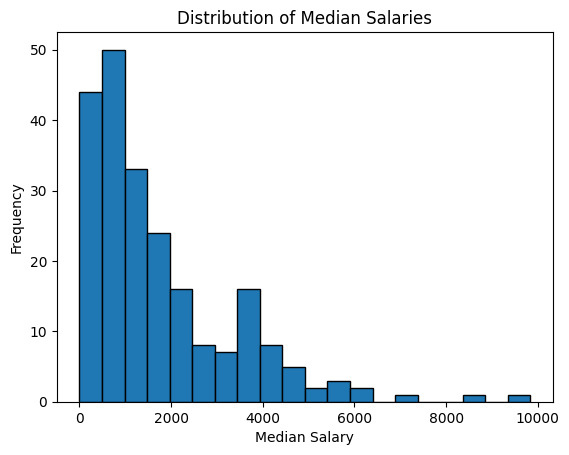

In [49]:
import matplotlib.pyplot as plt

plt.hist(data['median_salary'], bins=20, edgecolor='k')
plt.xlabel('Median Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Median Salaries')
plt.show()

#### Salary deviation

In [51]:
import plotly.express as px

# Create a scatter plot with colors representing salary deviation
fig = px.scatter(data, x='average_salary', y='country_name', color='salary_deviation_from_continent', color_continuous_scale='RdBu')

# Customize the appearance of the plot
fig.update_layout(
    title='Salary Deviation by Country',
    xaxis_title='Average Salary',
    yaxis_title='Country',
    coloraxis_colorbar_title='Salary Deviation'
)

# Show the interactive plot
fig.show()


#### How do median salaries vary by continent?

In [60]:
import plotly.express as px

# Create an interactive box plot
fig = px.box(data, x='continent_name', y='median_salary', color='continent_name',
             title='Distribution of Median Salary by Continent',
             labels={'median_salary': 'Median Salary', 'continent_name': 'Continent'})

fig.update_layout(xaxis_title='Continent', yaxis_title='Median Salary')
fig.show()


#### Top 4 countries with the highest Salary

In [63]:
import plotly.express as px

# Sort the data by median_salary in descending order and select the top 4 countries
top_countries = data.sort_values(by='highest_salary', ascending=False).head(4)

# Create an interactive pie chart
fig = px.pie(top_countries, names='country_name', values='highest_salary', title='Top 4 Countries with Highest Salaries')
fig.update_traces(textinfo='percent+label', pull=[0.2, 0, 0, 0], marker=dict(colors=px.colors.qualitative.Plotly))
fig.show()


In [65]:
data.head()

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary,salary_deviation_from_continent
0,Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97,-726.507722
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74,282.070088
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49,-2619.359912
3,Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18,536.090137
4,American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00,-376.011667


#### Top 4 Countries with the lowest average Salary

In [64]:
import plotly.express as px

# Sort the data by average_salary in ascending order and select the top 4 countries
top_lowest_average_salaries = data.sort_values(by='average_salary').head(4)

# Create an interactive pie chart
fig = px.pie(top_lowest_average_salaries, names='country_name', values='average_salary', title='Top 4 Countries with Lowest Average Salaries')
fig.update_traces(textinfo='percent+label', pull=[0.2, 0, 0, 0], marker=dict(colors=px.colors.qualitative.Set3))
fig.show()


#### Visualizations can provide valuable insights:


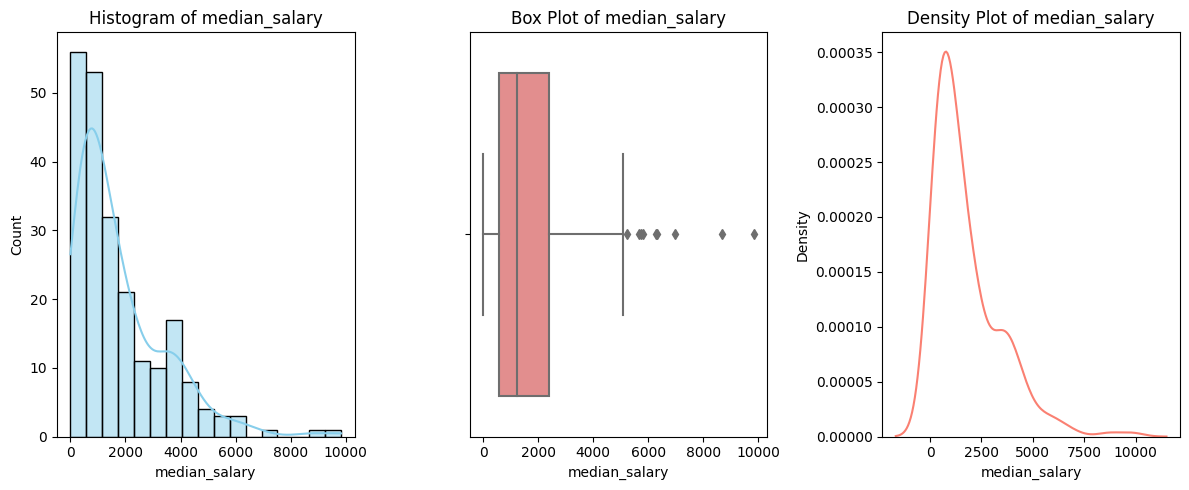

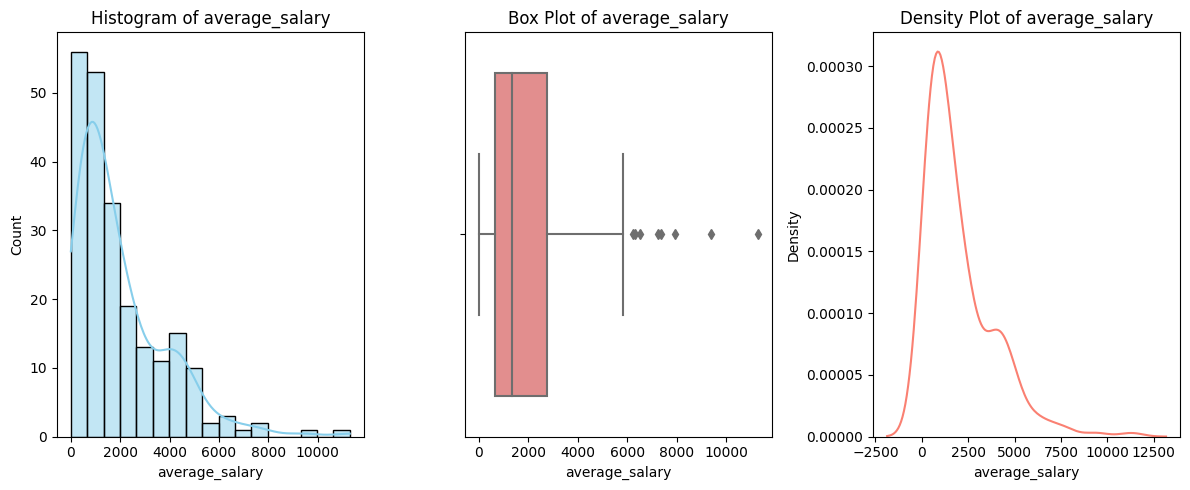

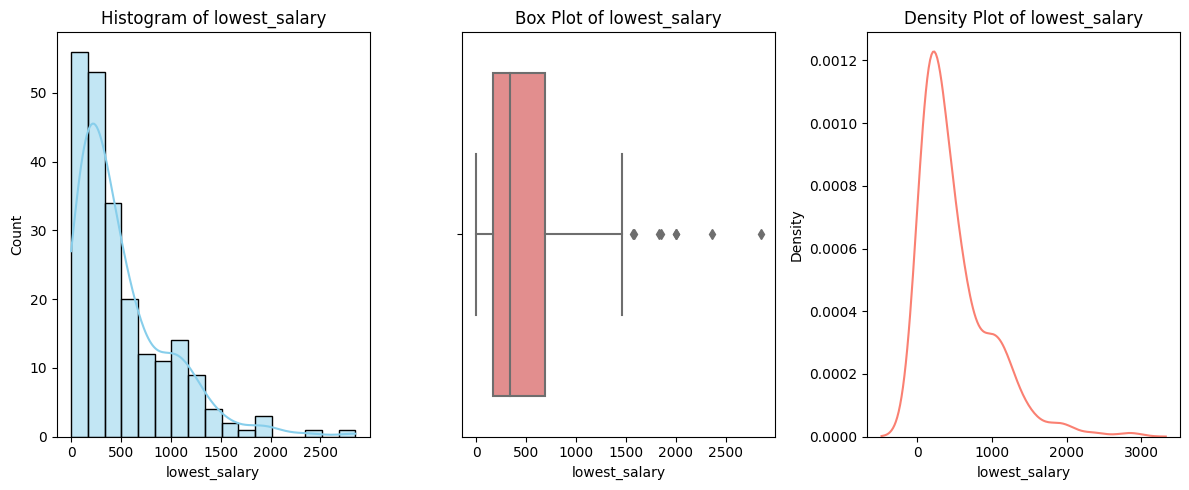

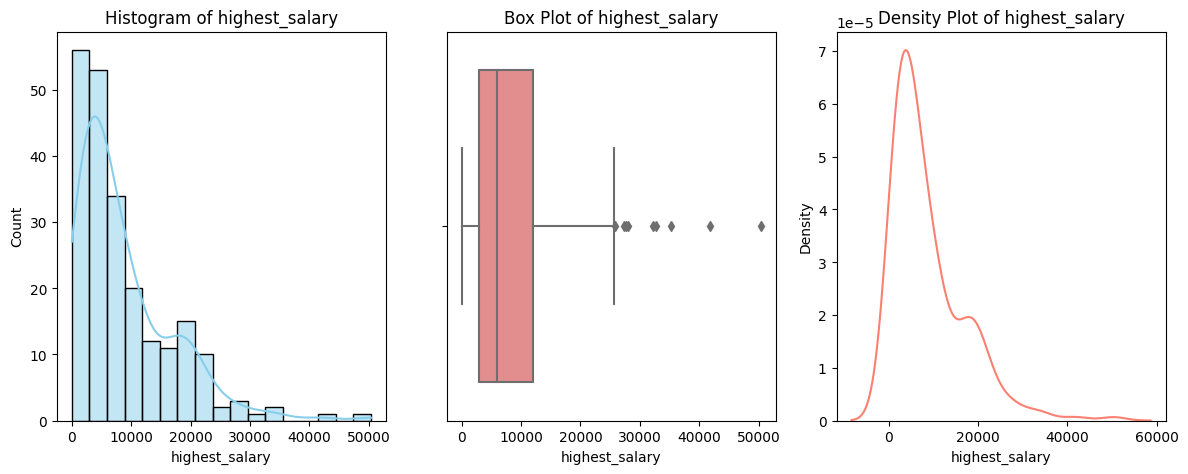

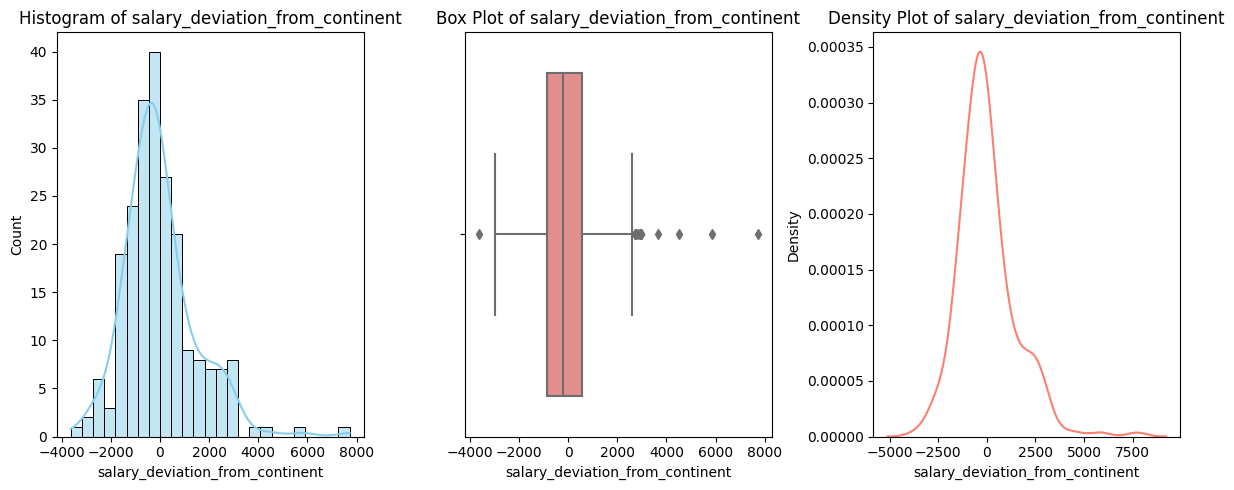

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['number'])
categorical_columns = data.select_dtypes(exclude=['number'])

# Numeric Columns
# Histograms, Box Plots, and Density Plots
for column in numeric_columns.columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.xlabel(column)
    plt.title(f'Histogram of {column}')
    
    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(data=data, x=column, color='lightcoral')
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    
    # Density Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(data[column], color='salmon')
    plt.xlabel(column)
    plt.title(f'Density Plot of {column}')
    
    plt.tight_layout()
    plt.show()

#### Top 4 Continents with the highest Salary

In [72]:
import pandas as pd

# Group the data by 'continent_name' and calculate the average salary for each continent
continent_salary = data.groupby('continent_name')['median_salary'].mean().reset_index()

# Sort the continents by average salary in descending order and select the top 4
top_4_continents = continent_salary.sort_values(by='median_salary', ascending=False).head(4)

# Display the top 4 continents with the highest average salary
print(top_4_continents)


     continent_name  median_salary
6  Northern America    4560.985000
4            Europe    3196.089334
5     North America    2370.973333
7           Oceania    1724.930556


In [74]:
import plotly.express as px

# Sort the continents by average salary in descending order and select the top 4
top_4_continents = continent_salary.sort_values(by='median_salary', ascending=False).head(4)

# Create an interactive pie chart with multiple colors
fig = px.pie(top_4_continents, names='continent_name', values='median_salary',
             title='Top 4 Continents with Highest Salaries', color='continent_name',
             labels={'median_salary': 'Median Salary', 'continent_name': 'Continent'})

fig.show()


#### Salary Deviation from Continent

In [77]:
fig = px.violin(data, x='continent_name', y='salary_deviation_from_continent', color='continent_name',
               title='Salary Deviation from Continent', labels={'salary_deviation_from_continent': 'Deviation'})
fig.show()


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     221 non-null    object 
 1   continent_name                   221 non-null    object 
 2   wage_span                        221 non-null    object 
 3   median_salary                    221 non-null    float64
 4   average_salary                   221 non-null    float64
 5   lowest_salary                    221 non-null    float64
 6   highest_salary                   221 non-null    float64
 7   salary_deviation_from_continent  221 non-null    float64
dtypes: float64(5), object(3)
memory usage: 13.9+ KB


#### Regression model for predicting 'average_salary'

- Data Preprocessing:

- First, you need to preprocess your data. This involves handling missing values, encoding categorical variables, and splitting the data into training and testing sets. Since 'country_name' and 'continent_name' are categorical variables, you will need to encode them.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
data['country_name'] = label_encoder.fit_transform(data['country_name'])
data['continent_name'] = label_encoder.fit_transform(data['continent_name'])

# Split the data into features (X) and the target variable (y)
X = data.drop(['average_salary'], axis=1)
y = data['average_salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 #### Choose a Regression Model:


- You can choose from various regression models. Let's use a simple linear regression model as an example:


In [84]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()


#### Train the Model

-  Fit the model to your training data to learn the relationships between the features and the target variable

In [106]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features (X) and the target variable (y)
X = data.drop(['average_salary'], axis=1)
y = data['average_salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


#### Visualization to better understand the model's performance.

In [105]:
import plotly.express as px

# Create a DataFrame for actual vs. predicted values
scatter_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create an interactive scatter plot with a black background and red points
fig = px.scatter(scatter_data, x='Actual', y='Predicted', title='Actual vs. Predicted Salary')
fig.update_traces(marker=dict(size=12, color='red'))
fig.update_layout(xaxis_title='Actual Salary', yaxis_title='Predicted Salary', plot_bgcolor='black')

fig.show()
